In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
import random

# Load the data (assuming the file is named 'epileptic_seizure_data.csv')
data = pd.read_csv('epileptic_seizure_data.csv')

# Drop the 'Unnamed' feature
data.drop(columns=['Unnamed'], inplace=True)

# Re-cast target variable 'y' as binary
data['y'] = data['y'].apply(lambda x: 1 if x == 1 else 0)

# Check for and fill any null or missing values
data.fillna(data.mean(), inplace=True)

# Separate features and target
X = data.drop(columns=['y'])
y = data['y']


In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

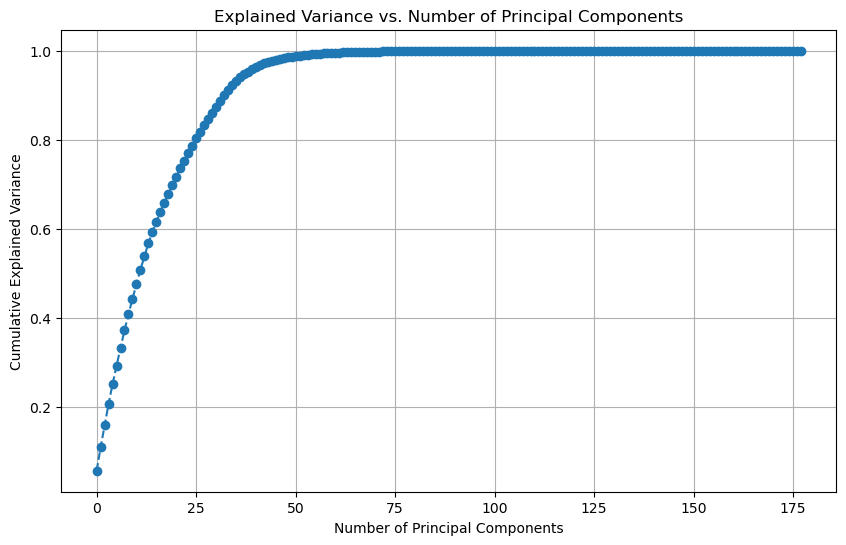

Variance explained by the first 50 principal components: 0.99


In [4]:
# Apply PCA with n_components=178
pca = PCA(n_components=178)
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Print the percentage of variance explained by the first 50 PCs
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Variance explained by the first 50 principal components: {explained_variance[49]:.2f}")


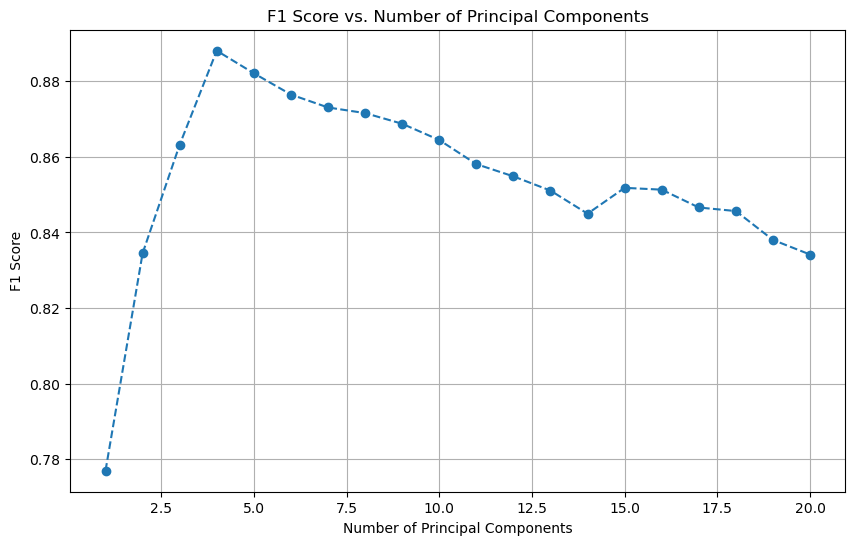

Optimal number of principal components: 4


In [5]:
# Initialize variables to store results
f1_scores = []
n_components_range = range(1, 21)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Loop through different numbers of principal components
for n_components in n_components_range:
    # Train k-NN classifier using the first n_components principal components
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train[:, :n_components], y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test[:, :n_components])
    
    # Calculate the f1_score and store it
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Plot the f1_scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, f1_scores, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Find the optimal number of PCs (max f1_score)
optimal_pc = n_components_range[np.argmax(f1_scores)]
print(f"Optimal number of principal components: {optimal_pc}")


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2752
           1       0.95      0.84      0.89       698

    accuracy                           0.96      3450
   macro avg       0.95      0.91      0.93      3450
weighted avg       0.96      0.96      0.96      3450



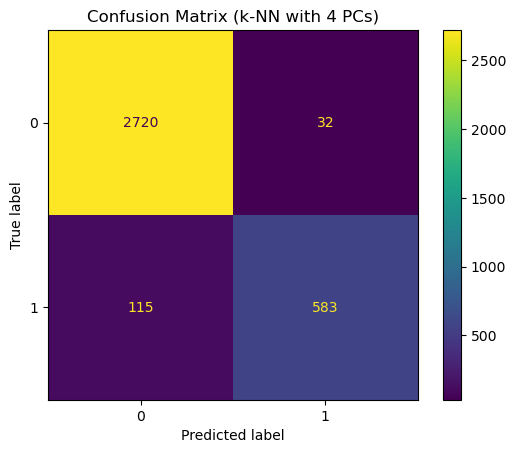

In [6]:
# Train k-NN classifier using the optimal number of PCs
knn_optimal = KNeighborsClassifier(n_neighbors=5)
knn_optimal.fit(X_train[:, :optimal_pc], y_train)

# Predict on the test set
y_pred_optimal = knn_optimal.predict(X_test[:, :optimal_pc])

# Calculate classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_optimal))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_optimal, X_test[:, :optimal_pc], y_test)
plt.title(f'Confusion Matrix (k-NN with {optimal_pc} PCs)')
plt.show()
